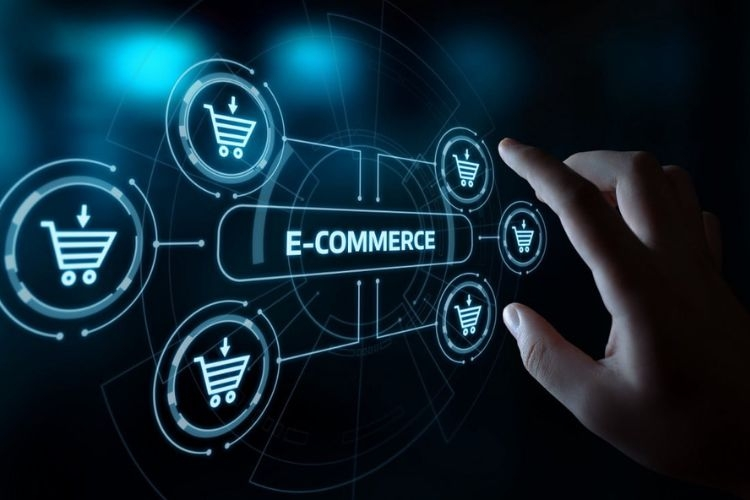

# GRADUATION PROJECT PROPOSAL
## An Analysis of the Factors Affecting Customer Churn 🛒🛒🛒

## Purpose and Expected Outcome

**Purpose:**

Analyze data to assess the factors influencing customer churn behavior.

Identify key trends and factors leading to customer churn.

Understand root causes and suggest solutions to reduce churn.

**Expected Outcome:**

Provide insights into the relationships between variables (e.g., complaints, satisfaction score, marital status, tenure, etc.) and churn behavior.

Build a machine learning model (e.g., Logistic Regression) to:

Predict the churn probability of current or new customers.

Automatically classify high-risk customers, enabling the business to take proactive retention actions.

## Questions to Answer

1. Which model best explains the factors leading to churn?

2. Which factors have the strongest impact on churn probability? Is there statistical evidence?

3. What insights can be drawn from the data to inform customer retention strategies?

4. What prediction probability threshold allows the model to detect the highest number of potential churn customers?

##Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Load the data about transactions by the following link:

https://www.kaggle.com/code/rishavwalde/e-commerce-customer-churn-analysis-and-prediction/notebook#Data-Exploration-and-Visualization

In [2]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')

Display basic information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Removing Irrelevant Identifier: Dropping 'CustomerID' for Analytical Clarity

In [4]:
df = df.drop('CustomerID', axis=1)

Let's take a look at the given data. Output the first 5 rows:

In [5]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Decription Analysis

In [6]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


# Cleaning Data

In [7]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   Int64  
 1   Tenure                       5366 non-null   Int64  
 2   PreferredLoginDevice         5630 non-null   string 
 3   CityTier                     5630 non-null   Int64  
 4   WarehouseToHome              5379 non-null   Int64  
 5   PreferredPaymentMode         5630 non-null   string 
 6   Gender                       5630 non-null   string 
 7   HourSpendOnApp               5375 non-null   Int64  
 8   NumberOfDeviceRegistered     5630 non-null   Int64  
 9   PreferedOrderCat             5630 non-null   string 
 10  SatisfactionScore            5630 non-null   Int64  
 11  MaritalStatus                5630 non-null   string 
 12  NumberOfAddress              5630 non-null   Int64  
 13  Complain          

## Fixing Data Type

In [8]:
category_cols =['Complain','CityTier','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Churn']
df[category_cols] = df[category_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5630 non-null   category
 1   Tenure                       5366 non-null   Int64   
 2   PreferredLoginDevice         5630 non-null   category
 3   CityTier                     5630 non-null   category
 4   WarehouseToHome              5379 non-null   Int64   
 5   PreferredPaymentMode         5630 non-null   category
 6   Gender                       5630 non-null   category
 7   HourSpendOnApp               5375 non-null   Int64   
 8   NumberOfDeviceRegistered     5630 non-null   Int64   
 9   PreferedOrderCat             5630 non-null   category
 10  SatisfactionScore            5630 non-null   Int64   
 11  MaritalStatus                5630 non-null   category
 12  NumberOfAddress              5630 non-null   Int64   
 13  Com

## Check for missing values

In [9]:
df.isnull().sum()

,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0
PreferedOrderCat,0


## Handling Missing Value

In [10]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].median())
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

## Checking Unique Values for All Columns:

In [11]:
for col in df.columns:
    print(f"\n🟨 Cột: {col}")
    print(df[col].unique())


🟨 Cột: Churn
[1, 0]
Categories (2, Int64): [0, 1]

🟨 Cột: Tenure
<IntegerArray>
[ 4,  9,  0, 13, 11, 19, 20, 14,  8, 18,  5,  2, 30,  1, 23,  3, 29,  6, 26,
 28,  7, 24, 25, 10, 15, 22, 27, 16, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 36, dtype: Int64

🟨 Cột: PreferredLoginDevice
['Mobile Phone', 'Phone', 'Computer']
Categories (3, string): [Computer, Mobile Phone, Phone]

🟨 Cột: CityTier
[3, 1, 2]
Categories (3, Int64): [1, 2, 3]

🟨 Cột: WarehouseToHome
<IntegerArray>
[  6,   8,  30,  15,  12,  22,  11,   9,  31,  18,  13,  20,  29,  28,  26,
  14,  10,  27,  17,  23,  33,  19,  35,  24,  16,  25,  32,  34,   5,  21,
 126,   7,  36, 127]
Length: 34, dtype: Int64

🟨 Cột: PreferredPaymentMode
['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card']
Categories (7, string): [CC, COD, Cash on Delivery, Credit Card, Debit Card, E wallet, UPI]

🟨 Cột: Gender
['Female', 'Male']
Categories (2, string): [Female, Male]

🟨 Cột: HourSpendOnApp
<IntegerArray>
[3, 2, 1, 0, 4

### Processing the PreferredPaymentMode column

In [12]:
# Gộp các giá trị tương đương trong cột PaymentMethod
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'Cash on Delivery': 'COD',
    'Credit Card': 'CC'
})
print(df['PreferredPaymentMode'].unique())

['Debit Card', 'UPI', 'CC', 'COD', 'E wallet']
Categories (5, string): [CC, COD, Debit Card, E wallet, UPI]


/tmp/ipython-input-452927909.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({


>'Cash on Delivery' and 'Credit Card' were shortened to 'COD' and 'CC' respectively to standardize formatting, keep the data concise, and make it easier to display, analyze, and visualize without losing the original meaning.

### Processing the PreferredLoginDevice column

In [13]:
# Gộp các giá trị tương đương trong cột DeviceType (hoặc đổi lại nếu tên cột khác)
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({
    'Mobile Phone': 'Phone',
    'Phone': 'Phone'
})
print(df['PreferredPaymentMode'].unique())

['Debit Card', 'UPI', 'CC', 'COD', 'E wallet']
Categories (5, string): [CC, COD, Debit Card, E wallet, UPI]


/tmp/ipython-input-1063945144.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({


>Mobile Phone' and 'Mobile' refer to the same product category, but were recorded under slightly different labels. Standardizing them into a single category 'Phone' ensures data consistency, avoids splitting the same category into multiple groups, and provides more reliable statistical analysis.

### Processing the 'PreferredOrderCat' column

In [14]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({
    'Mobile Phone': 'Phone',
    'Mobile': 'Phone',
})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Others', 'Grocery'], 'Rare')
print(df['PreferedOrderCat'].unique())

['Laptop & Accessory', 'Phone', 'Rare', 'Fashion']
Categories (4, string): [Fashion, Rare, Laptop & Accessory, Phone]


/tmp/ipython-input-3238194336.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({
/tmp/ipython-input-3238194336.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Others', 'Grocery'], 'Rare')


>Mobile Phone' and 'Mobile' refer to the same product category, but were recorded under slightly different labels. Standardizing them into a single category 'Phone' ensures data consistency, avoids splitting the same category into multiple groups, and provides more reliable statistical analysis.

>"The 'Others' and 'Grocery' groups have a very low frequency after the outlier removal step, making them statistically insignificant for analysis or model training. Merging them into a 'Rare' category helps stabilize the model, reduce noise from sparse data, and still retain the information instead of removing it entirely."

## Check Duplicate

In [15]:
df.duplicated().sum()

np.int64(559)

## Delete Duplicate

In [16]:
df.drop_duplicates(inplace=True)

## Checking Outliners

/tmp/ipython-input-3390184428.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(['Not Churned (0)', 'Churned (1)'])


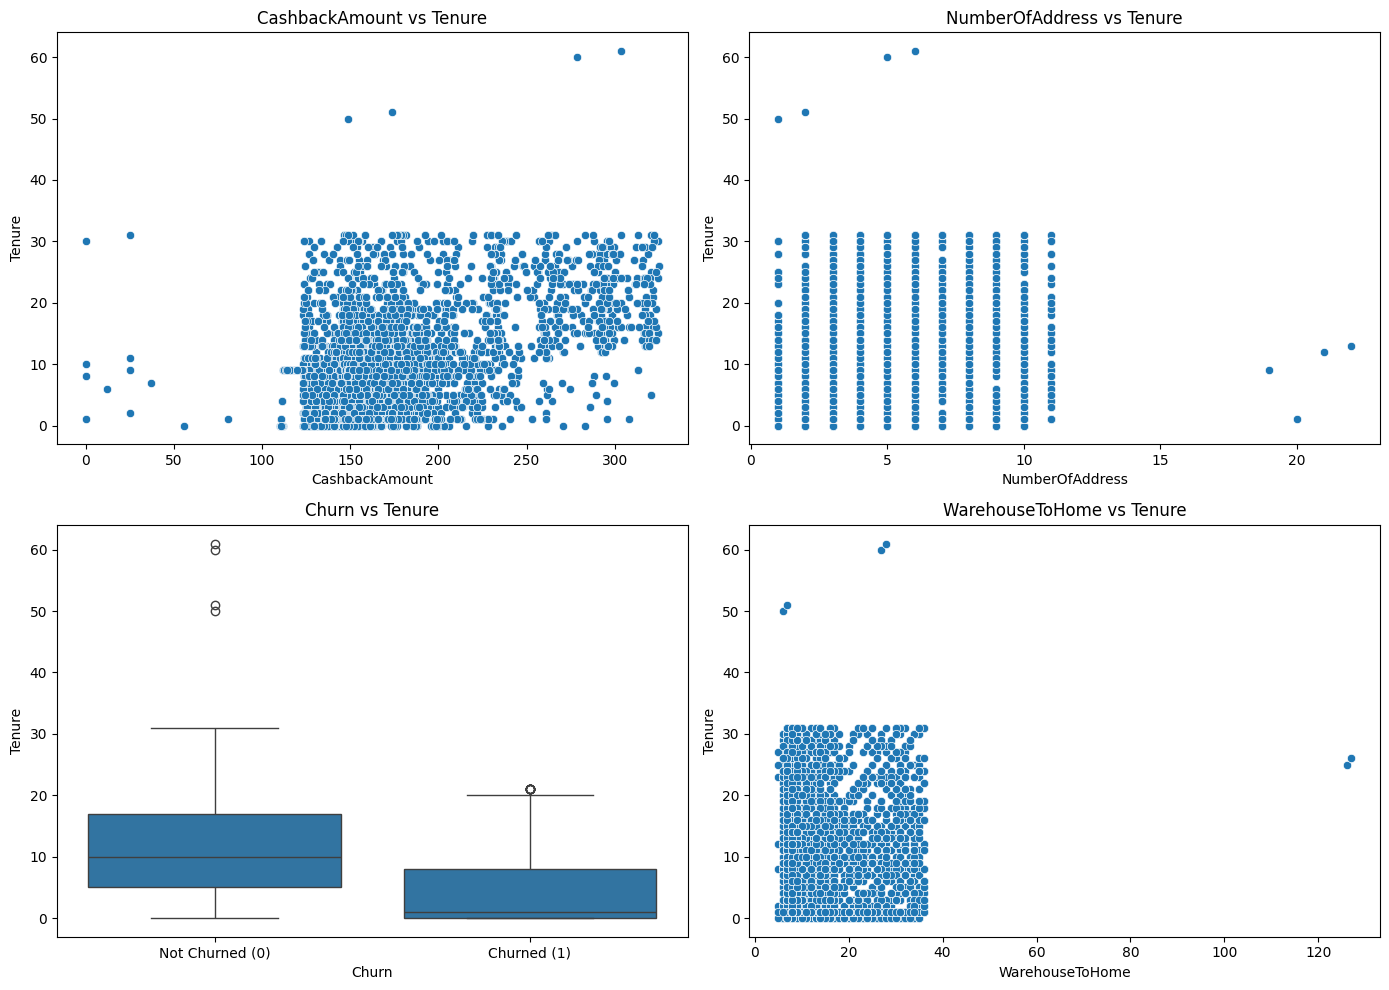

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Tenure vs CashbackAmount (liên tục → scatter)
sns.scatterplot(x='CashbackAmount', y='Tenure', data=df, ax=axs[0, 0])
axs[0, 0].set_title('CashbackAmount vs Tenure')

# 2. Tenure vs NumberOfAddress (liên tục → scatter)
sns.scatterplot(x='NumberOfAddress', y='Tenure', data=df, ax=axs[0, 1])
axs[0, 1].set_title('NumberOfAddress vs Tenure')

# 3. Tenure vs Churn (nhị phân → boxplot)
sns.boxplot(x='Churn', y='Tenure', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Churn vs Tenure')
axs[1, 0].set_xticklabels(['Not Churned (0)', 'Churned (1)'])

# 4. Tenure vs WarehouseToHome (liên tục → scatter)
sns.scatterplot(x='WarehouseToHome', y='Tenure', data=df, ax=axs[1, 1])
axs[1, 1].set_title('WarehouseToHome vs Tenure')

plt.tight_layout()
plt.show()

>Because the number of outliers is extremely small and their impact on the analysis/model results is nearly zero, keeping or removing them will not significantly affect the final outcome.
Therefore, removing them can be considered for the purpose of data cleaning, but it is not mandatory from the perspective of result impact.

## Delete Outliners

In [18]:
def remove_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df = remove_outliers(df, col)

In [20]:
df.describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3079.0,3079.0,3079.0,3079.0,3079.0,3079.0,3079.0,3079.0,3079.0,3079.0,3079.0
mean,8.479701,14.927899,2.927574,3.71809,3.021436,4.215654,15.623254,1.107827,1.677493,3.152647,159.253592
std,7.668118,7.371071,0.697822,0.802308,1.370887,2.573848,3.50415,0.799245,0.632854,2.40561,28.535246
min,0.0,5.0,1.0,2.0,1.0,1.0,11.0,0.0,1.0,0.0,81.0
25%,1.0,9.0,2.0,3.0,2.0,2.0,13.0,1.0,1.0,2.0,139.8
50%,8.0,14.0,3.0,4.0,3.0,3.0,15.0,1.0,2.0,3.0,153.26
75%,12.0,18.0,3.0,4.0,4.0,6.0,18.0,2.0,2.0,4.0,174.945
max,31.0,34.0,4.0,5.0,5.0,11.0,25.0,3.0,3.0,9.0,243.36


# EDA (Exploratory Data Analysis)

## Percentage of Customer Churn

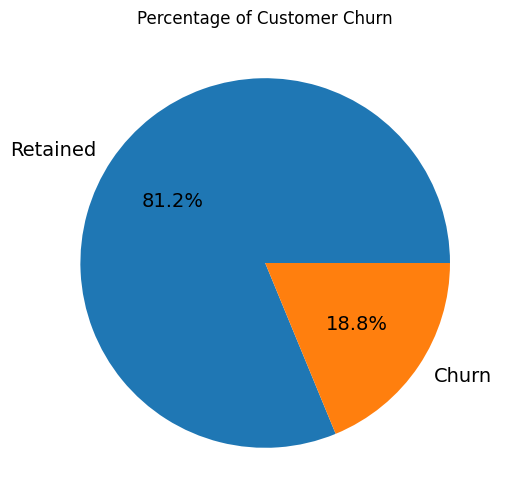

In [21]:
labels = ['Retained','Churn']
counts = df['Churn'].value_counts()
# print(counts)

plt.figure(figsize=(6,6))
plt.title('Percentage of Customer Churn')
plt.pie(counts, autopct='%1.1f%%', labels=labels, textprops={"fontsize":14})
plt.show()

> 81.2% of customers are retained, while 18.8% have churned. The churn rate is not extremely high but still significant enough to impact revenue, indicating a need to analyze the churn group’s characteristics and reasons to improve retention.

### Gender by Churn

/tmp/ipython-input-1232755303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df, x='Gender', palette='Set2')


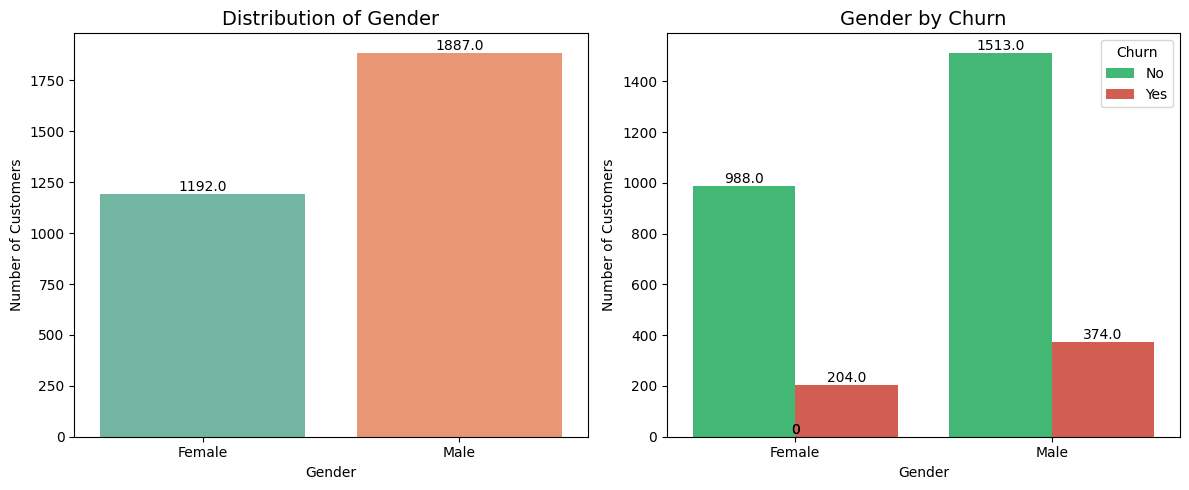

In [22]:
plt.figure(figsize=(12, 5))

# 1. Distribution of Gender
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Distribution of Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Number of Customers")

# Add labels
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10)

# 2. Gender by Churn
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df, x='Gender', hue='Churn', palette={0: '#2ecc71', 1: '#e74c3c'})
plt.title("Gender by Churn", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])

# Add labels
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

>The data shows that male customers (1,887) significantly outnumber female customers (1,192). In terms of churn behavior, males have a higher number of churned customers (374) compared to females (204). However, in both gender groups, the majority of customers remain retained (males: 1,513; females: 988), indicating that while males account for a larger share of both total customers and churn cases, customer retention remains dominant across both genders.

### City Tier by Churn

/tmp/ipython-input-1715586345.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df, x='CityTier', palette='Set2')


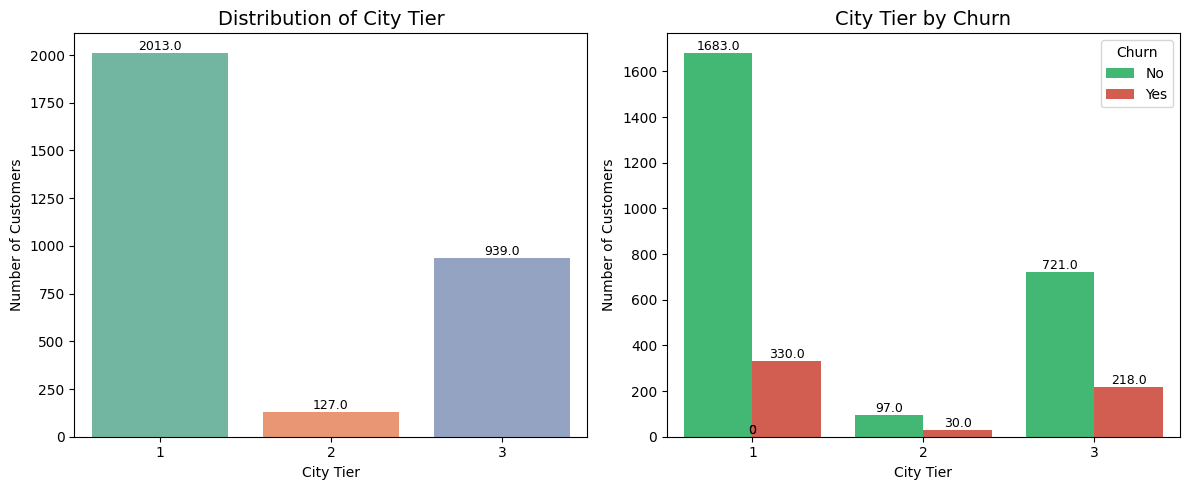

In [23]:
plt.figure(figsize=(12, 5))

# 1. Distribution of City Tier
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df, x='CityTier', palette='Set2')
plt.title("Distribution of City Tier", fontsize=14)
plt.xlabel("City Tier")
plt.ylabel("Number of Customers")

# Add labels
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=9)

# 2. City Tier by Churn
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df, x='CityTier', hue='Churn', palette={0: '#2ecc71', 1: '#e74c3c'})
plt.title("City Tier by Churn", fontsize=14)
plt.xlabel("City Tier")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])

# Add labels
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

>The majority of customers come from City Tier 1 (2,013), followed by City Tier 3 (939), and the smallest group from City Tier 2 (127). In terms of churn count, City Tier 1 leads with 330 churned customers, but proportionally, City Tier 3 shows a relatively higher churn rate (218 out of 939 customers). City Tier 2 has both the lowest customer count and the lowest churn numbers.

### Marital Status by Churn

/tmp/ipython-input-3884151757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df, x='MaritalStatus', palette='Blues')


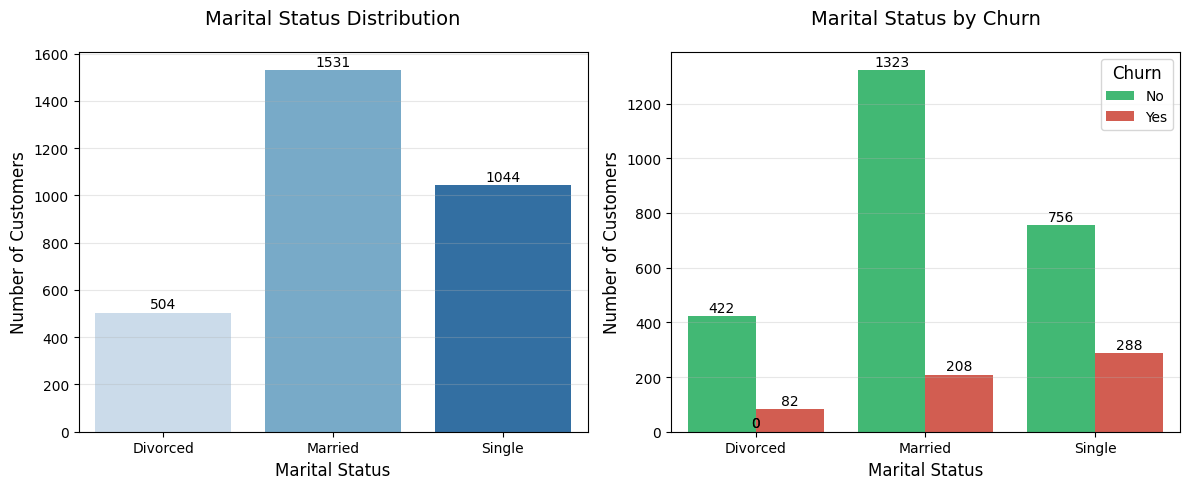

In [24]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df, x='MaritalStatus', palette='Blues')


for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2, height + 5,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.title('Marital Status Distribution', pad=20, fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', alpha=0.3)


plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df, x='MaritalStatus', hue='Churn',
                    palette={0: '#2ecc71', 1: '#e74c3c'})

for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2, height + 5,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.title('Marital Status by Churn', pad=20, fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'], title_fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

>Married customers form the largest group (1,531), followed by single (1,044) and divorced (504). In terms of churn count, married customers lead with 208 churned customers, but the highest churn rate is observed among single customers (288 out of 1,044). Divorced customers have both the lowest churn count and the lowest churn rate (82 out of 504).

### **Multivariate analysis:** Churn by Gender and City Tier

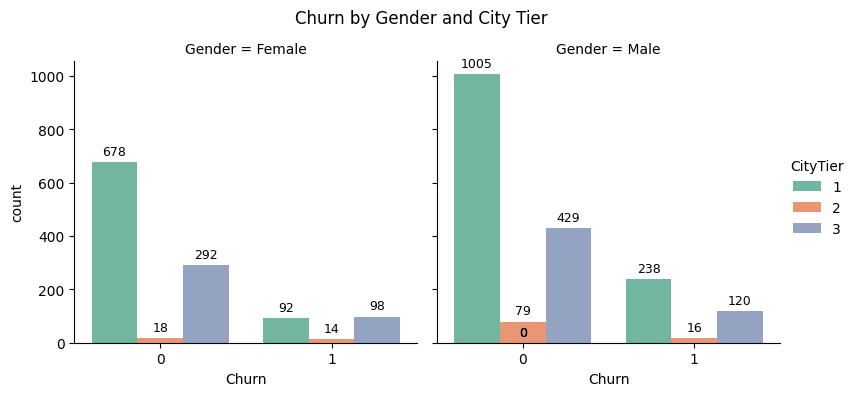

In [25]:
# Vẽ catplot
g = sns.catplot(
    data=df,
    x='Churn',
    hue='CityTier',
    col='Gender',
    kind='count',
    palette='Set2',
    height=4,
    aspect=1
)

# Thêm nhãn số trên từng cột
for ax in g.axes.flatten():
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            xytext=(0, 3),
            textcoords='offset points'
        )

# Tiêu đề chung
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Churn by Gender and City Tier")

plt.show()

>For both male and female customers, City Tier 1 has the largest customer base and also the highest churn count.

>Female: City Tier 1 recorded 92 churn, City Tier 3 had 98 churn, while City Tier 2 showed very low churn (14).

>Male: City Tier 1 had 238 churn, City Tier 3 had 120 churn, and City Tier 2 had the lowest churn (16).
Overall, churn is concentrated in City Tier 1 and 3, with male customers in City Tier 1 showing the highest churn count.

>>**Female – City Tier 1:** Large customer base but lower churn rate compared to City Tier 3 → high-value segment, should focus on upselling and cross-selling.

>>**Female – City Tier 3:** Although this group has fewer customers than City Tier 1, the churn rate among females here is higher → should be prioritized for customer care, service improvements, and enhanced experience.

### **Multivariate analysis:** Churn by Gender and MaritalStatus

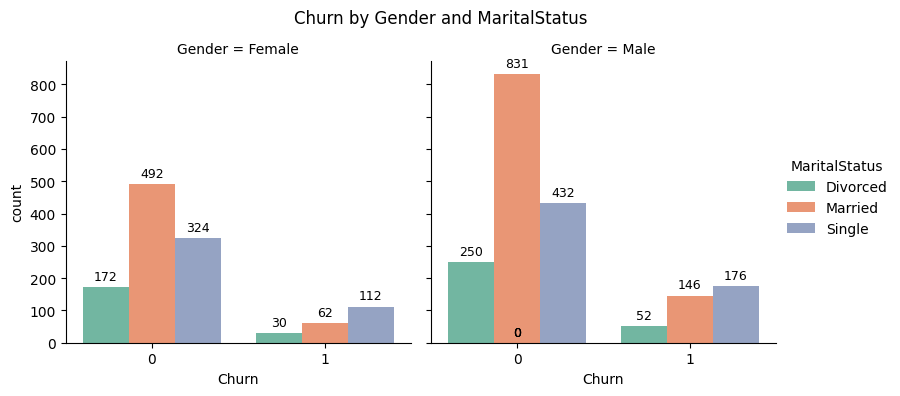

In [26]:
# Vẽ catplot
g = sns.catplot(
    data=df,
    x='Churn',
    hue='MaritalStatus',
    col='Gender',
    kind='count',
    palette='Set2',
    height=4,
    aspect=1
)

# Thêm nhãn số trên từng cột
for ax in g.axes.flatten():
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            xytext=(0, 3),
            textcoords='offset points'
        )

# Tiêu đề chung
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Churn by Gender and MaritalStatus")

plt.show()

>Marital status strongly impacts churn

>Married: low churn rate (Female: 62/554 ≈ 11.2%, Male: 146/977 ≈ 14.9%).

>Single: higher churn rate (Female: 112/436 ≈ 25.7%, Male: 176/608 ≈ 28.9%).

>Gender influence

>Female Single: 25.7% churn rate.

>Male Single: 28.9% churn rate (slightly higher than females).

>Married males are the most loyal group (14.9% churn).

>Divorced group has smaller size and moderate churn rates (Female: 30/202 ≈ 14.9%, Male: 52/302 ≈ 17.2%).

### Distribution of Tenure by Churn Status

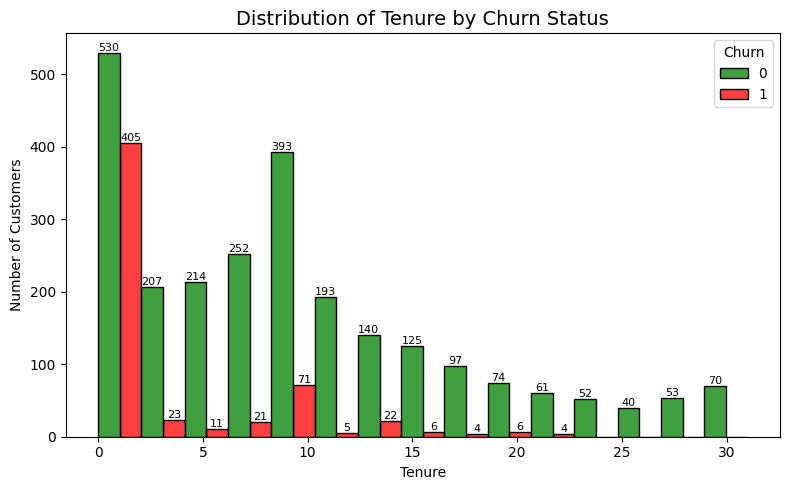

In [27]:
plt.figure(figsize=(8, 5))


sns.histplot(
    data=df,
    x='Tenure',
    hue='Churn',
    multiple='dodge',
    bins=15,
    palette={0: 'green', 1: 'red'},
    kde=False
)


ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8, color='black')

plt.title('Distribution of Tenure by Churn Status', fontsize=14)
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

>Customers who churn (red) are concentrated in the low tenure (0–3) group, with churn rates dropping sharply as tenure increases.
→ The longer the tenure, the lower the likelihood of churn.

>–3 months → Golden stage for retention, requires the highest resource priority due to the highest churn rate; focus on onboarding, welcome offers, and proactive customer care.

>4–10 months → Maintain engagement and increase order value through loyalty points, personalized product recommendations, and regular promotions.

>over 10 months → Focus on nurturing loyalty, rewarding long-term customers, and encouraging referrals.

>In short, the first 3 months are the most critical for preventing churn, months 4–10 are about strengthening the relationship, and beyond 10 months is the time to cultivate loyalty and turn customers into brand advocates.


### HourSpendOnApp

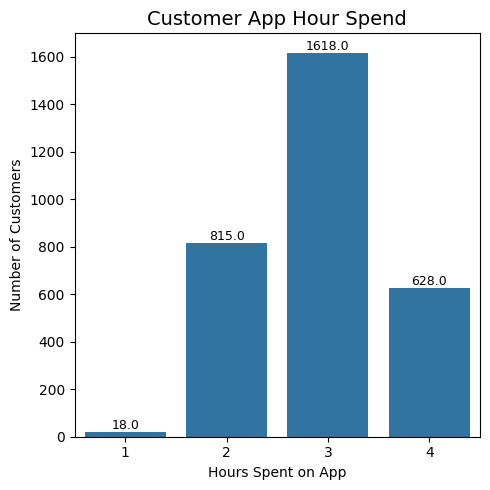

In [28]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['HourSpendOnApp'])

plt.title('Customer App Hour Spend', fontsize=14)
plt.xlabel('Hours Spent on App')
plt.ylabel('Number of Customers')

# Thêm label số lượng
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


>Most customers spend 3 hours on the app (1,618 users), followed by 2 hours (815 users) and 4 hours (628 users). Only a very small group (18 users) spend just 1 hour.

### Distribution of Order Count by Churn

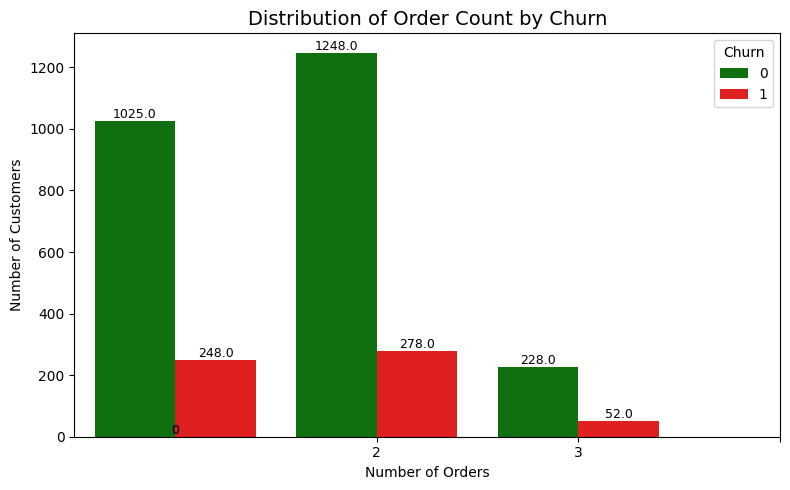

In [29]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='OrderCount',
    hue='Churn',
    palette={0: 'green', 1: 'red'}
)

plt.title('Distribution of Order Count by Churn', fontsize=14)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

# Chỉ giữ số nguyên trên trục X
plt.xticks(np.arange(df['OrderCount'].min(), df['OrderCount'].max() + 1, 1))

# Thêm label số lượng trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

>Churned customers (red) are mostly in the 2 orders group (278) and 1 order group (248).
Non-churn customers (green) are concentrated in 2 orders (1,248) and 1 order (1,025).

>→ Overall, churn is higher among customers with fewer orders.

### Distribution of Coupons Used by Churn

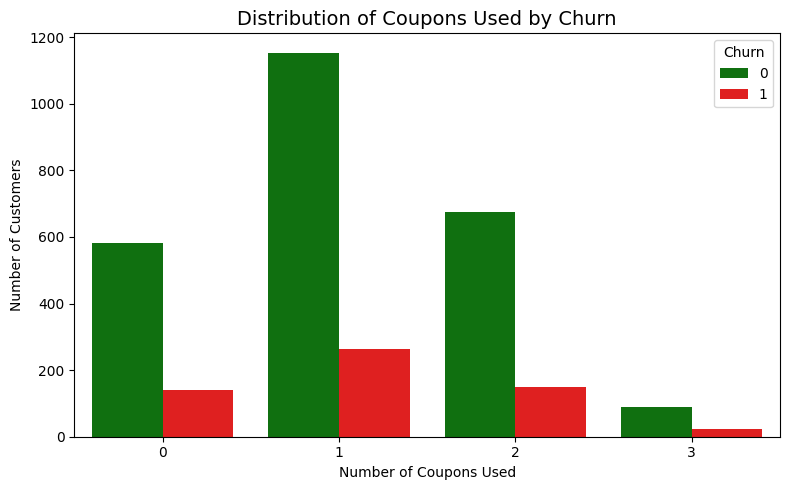

In [30]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='CouponUsed',
    hue='Churn',
    palette={0: 'green', 1: 'red'}
)

plt.title('Distribution of Coupons Used by Churn', fontsize=14)
plt.xlabel('Number of Coupons Used')
plt.ylabel('Number of Customers')

# Chỉ giữ tick số nguyên
plt.xticks(np.arange(df['CouponUsed'].min(), df['CouponUsed'].max() + 1, 1))

plt.tight_layout()
plt.show()

>Churned customers (red) are highest in the 1 coupon used group (~260) and the 0 coupon group (~140).
Non-churn customers (green) peak at 1 coupon (~1,150), followed by 2 coupons (~680) and 0 coupons (~580).
→ Churn is more common among customers who use few or no coupons.

### Distribution of Cashback Amount by Churn

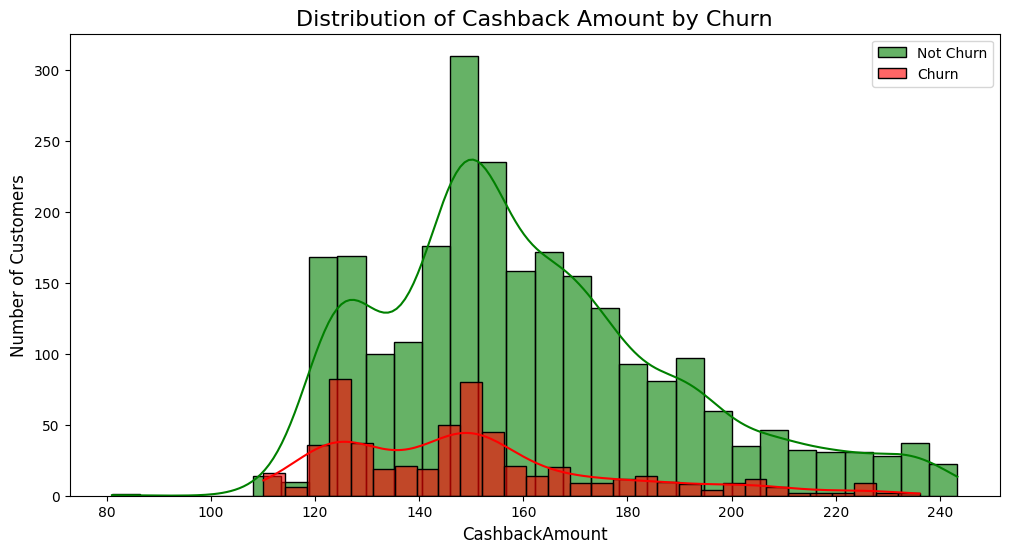

In [31]:
plt.figure(figsize=(12,6))

# Histogram cho churn = 0
sns.histplot(df[df['Churn']==0]['CashbackAmount'],
             color='green', label='Not Churn', kde=True, bins=30, alpha=0.6)

# Histogram cho churn = 1
sns.histplot(df[df['Churn']==1]['CashbackAmount'],
             color='red', label='Churn', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of Cashback Amount by Churn', fontsize=16)
plt.xlabel('CashbackAmount', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

>Churned customers (red) and non-churn customers (green) are both concentrated in the 120–160 cashback range.
However, the non-churn group has a wider distribution with a clear peak around 150, while the churn group has two smaller peaks near 125 and 150.
→ Higher cashback amounts tend to be associated with non-churn customers, while churn is more common at medium cashback levels.

### Scatter: Tenure vs CashbackAmount (Colored by Churn)

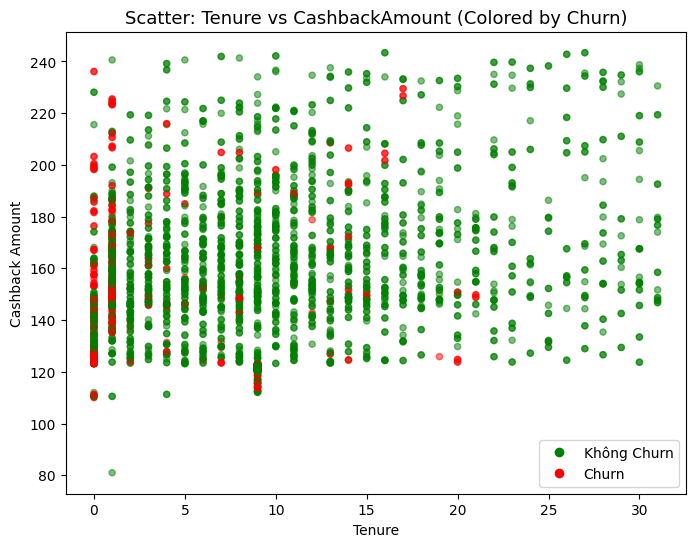

In [32]:
plt.figure(figsize=(8, 6))

# Màu cho churn
colors = df['Churn'].map({0: 'green', 1: 'red'})

# Plot 2D scatter
plt.scatter(
    df['Tenure'],
    df['CashbackAmount'],
    c=colors,
    alpha=0.5,  # độ trong suốt
    s=20        # kích thước điểm
)

# Nhãn trục
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')

# Tiêu đề
plt.title('Scatter: Tenure vs CashbackAmount (Colored by Churn)', fontsize=13)

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Không Churn', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Churn', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements)

plt.show()

>Conclusion:
From the chart, churned customers (red) are heavily concentrated in the low tenure range (0–5 months) and often have CashbackAmount around 120–160. In contrast, non-churn customers (green) are more widely distributed across both tenure and cashback values, with many reaching CashbackAmount above 180. This suggests that short tenure and low cashback may be associated with a higher churn risk.

### Number of Complaints by Churn

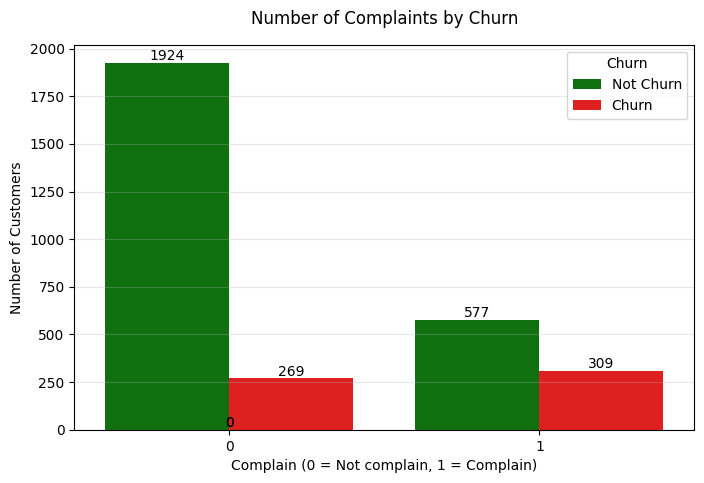

In [33]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    x='Complain',
    hue='Churn',
    data=df,
    palette={0: 'green', 1: 'red'}
)

# Thêm số liệu trên cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.title('Number of Complaints by Churn', pad=15)
plt.xlabel('Complain (0 = Not complain, 1 = Complain)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])
plt.grid(axis='y', alpha=0.3)
plt.show()

**Insight:**

Customers who file complaints have a significantly higher churn rate. In the group with complaints (Complain = 1), churned customers (309) are more than half the number of retained customers (577). In contrast, in the group without complaints (Complain = 0), churned customers (269) account for a very small proportion compared to retained customers (1924). This indicates that complaints are a strong predictor of churn and should be addressed promptly.

### Satisfaction Score by Churn Status

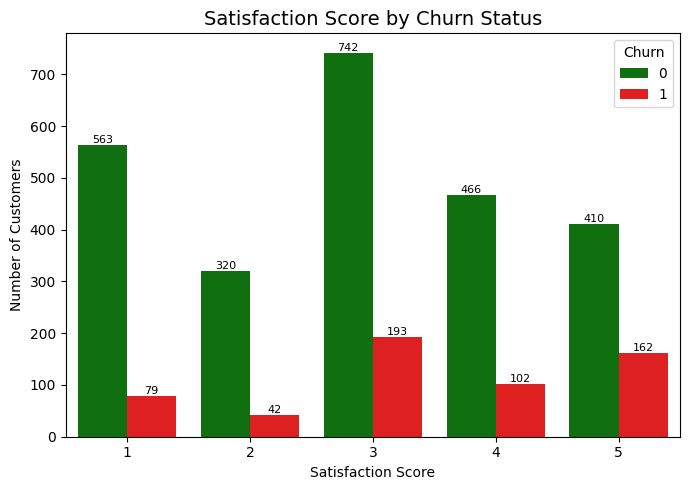

In [34]:
plt.figure(figsize=(7, 5))
sns.countplot(
    data=df,
    x='SatisfactionScore',
    hue='Churn',
    palette={0: 'green', 1: 'red'}
)

plt.title('Satisfaction Score by Churn Status', fontsize=14)
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')

# Ghi giá trị số lên cột
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

>The majority of customers fall into the Satisfaction Score = 3 group (742 retained, 193 churned), indicating a dominant neutral sentiment. However, this group has a churn rate of ~20.6%, higher than the low-score groups (1–2) at ~11–12%, suggesting that neutral customers are more susceptible to external influences and have a higher risk of churn than those with lower satisfaction.

### Day Since Last Order vs Churn

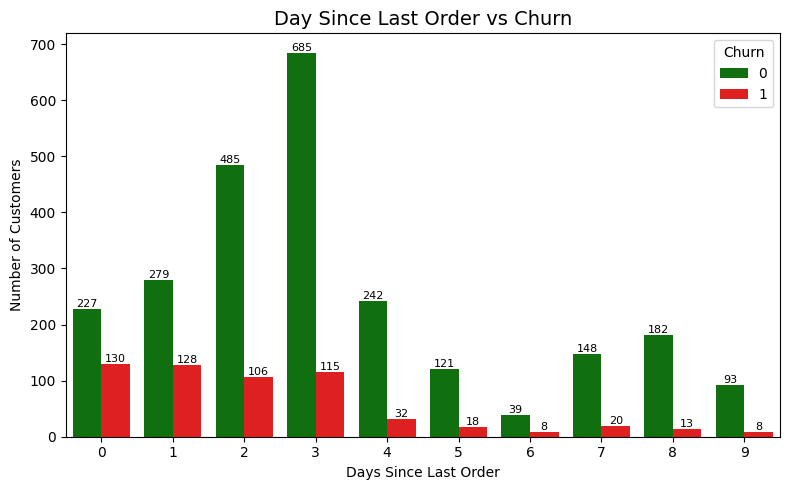

In [35]:
# Vẽ Countplot
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='DaySinceLastOrder',
    hue='Churn',
    palette={0: 'green', 1: 'red'}
)

plt.title('Day Since Last Order vs Churn', fontsize=14)
plt.xlabel('Days Since Last Order')
plt.ylabel('Number of Customers')

# Hiển thị giá trị trên cột
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

>Churned customers (red) are most common at 0–3 days since last order, especially at day 0 (130) and day 1 (128).
Non-churn customers (green) peak strongly at 3 days (685), followed by 2 days (485) and 1 day (279).
→ Churn tends to occur among customers who ordered very recently (within 3 days), while loyal customers are more concentrated around 2–3 days since their last order.

### **Multivariate analysis:** Customer Distribution by Satisfaction Score, Complaint, and Churn

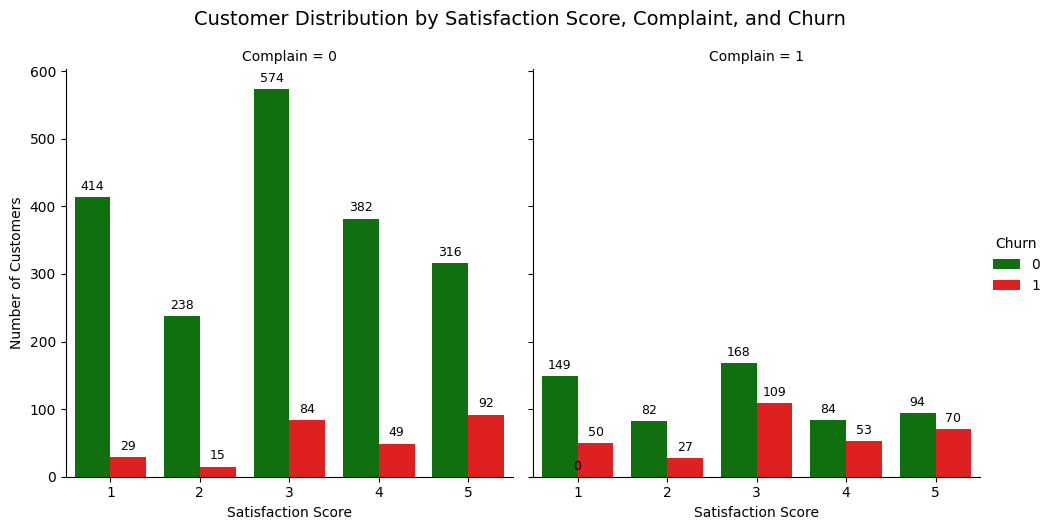

In [36]:
g = sns.catplot(
    data=df,
    x="SatisfactionScore",
    hue="Churn",
    col="Complain",
    kind="count",
    palette={0: 'green', 1: 'red'},
    height=5,
    aspect=1
)

# Ghi số trên đầu cột
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color='black', xytext=(0, 3),
            textcoords='offset points'
        )

g.set_axis_labels("Satisfaction Score", "Number of Customers")
g.set_titles("Complain = {col_name}")
g.fig.suptitle("Customer Distribution by Satisfaction Score, Complaint, and Churn", fontsize=14, y=1.05)

plt.show()

**Conclusion:**

Complain = 0: Customers without complaints generally show significantly lower churn across all Satisfaction Score levels.

Complain = 1: The pattern shifts notably. At Satisfaction Score = 5, churn is almost equal to non-churn (70 vs 94), indicating that even previously very satisfied customers are highly likely to leave after experiencing an issue.

Implication: A single negative experience can completely override prior positive sentiment, turning “loyal” customers into rapid churners.

### NumberOfDeviceRegistered

/tmp/ipython-input-2173344765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumberOfDeviceRegistered', data=df, palette='Blues', ax=ax1)


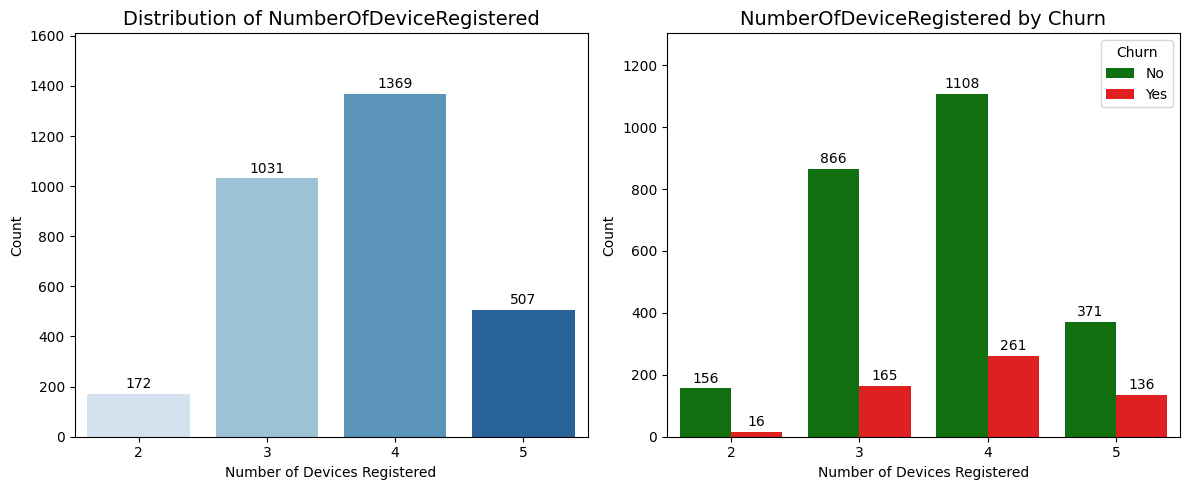

In [37]:
plt.figure(figsize=(12,5))

# 1) Phân phối tổng
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='NumberOfDeviceRegistered', data=df, palette='Blues', ax=ax1)
ax1.set_title('Distribution of NumberOfDeviceRegistered', fontsize=14)
ax1.set_xlabel('Number of Devices Registered')
ax1.set_ylabel('Count')

# 2) Phân phối theo Churn
ax2 = plt.subplot(1, 2, 2)
sns.countplot(
    x='NumberOfDeviceRegistered',
    hue='Churn',
    data=df,
    palette={0: 'green', 1: 'red'},
    ax=ax2
)
ax2.set_title('NumberOfDeviceRegistered by Churn', fontsize=14)
ax2.set_xlabel('Number of Devices Registered')
ax2.set_ylabel('Count')
ax2.legend(title='Churn', labels=['No', 'Yes'])

# === Thêm số trên đầu cột cho cả hai biểu đồ ===
for ax in [ax1, ax2]:
    # chừa khoảng trống để số không bị cắt
    ax.set_ylim(0, ax.get_ylim()[1] * 1.12)
    # dùng bar_label để gắn số cho từng "container" (nhóm cột)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=2, fontsize=10)

plt.tight_layout()
plt.show()

>Most common number of registered devices is 4 (1,369 customers), followed by 3 (1,031), 5 (507), and least is 2 (172).

>Churn (red) is highest in the 4 devices group (261) and 3 devices group (165).

>Non-churn customers (green) dominate at all levels, especially in 4 devices (1,108) and 3 devices (866).
→ Churn tends to be higher among customers with 3–4 registered devices.

### PreferedOrderCat by Churn

/tmp/ipython-input-635325075.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='PreferedOrderCat', data=df, palette='Blues')


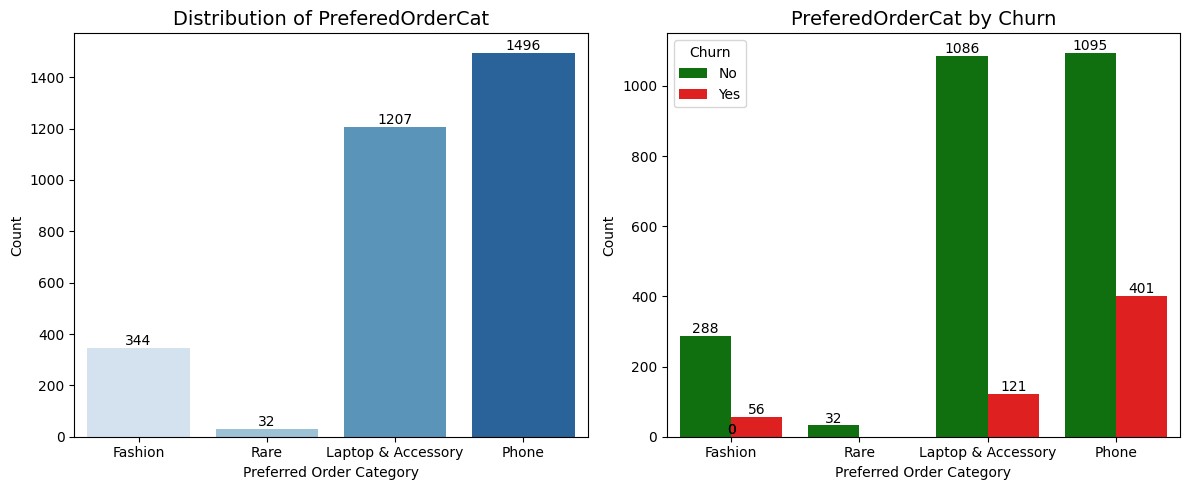

In [38]:
plt.figure(figsize=(12,5))

# 1. Phân phối tổng
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='PreferedOrderCat', data=df, palette='Blues')
plt.title('Distribution of PreferedOrderCat', fontsize=14)
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')

# Hiển thị số trên từng cột
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

# 2. Phân phối theo Churn
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='PreferedOrderCat', hue='Churn', data=df, palette={0:'green', 1:'red'})
plt.title('PreferedOrderCat by Churn', fontsize=14)
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])

# Hiển thị số trên từng cột
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

>Most popular order categories are Phone (1,496 customers) and Laptop & Accessory (1,207), followed by Fashion (344) and Rare (32).

>Churn (red) is highest in the Phone category (401) and then Laptop & Accessory (121).

>Non-churn (green) dominates all categories, especially Phone (1,095) and Laptop & Accessory (1,086).
→ Customers preferring Phone have the largest churn count, though they also make up the biggest loyal group.

### PreferredLoginDevice by Churn

/tmp/ipython-input-3946403918.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='PreferredLoginDevice', data=df, palette='Blues')


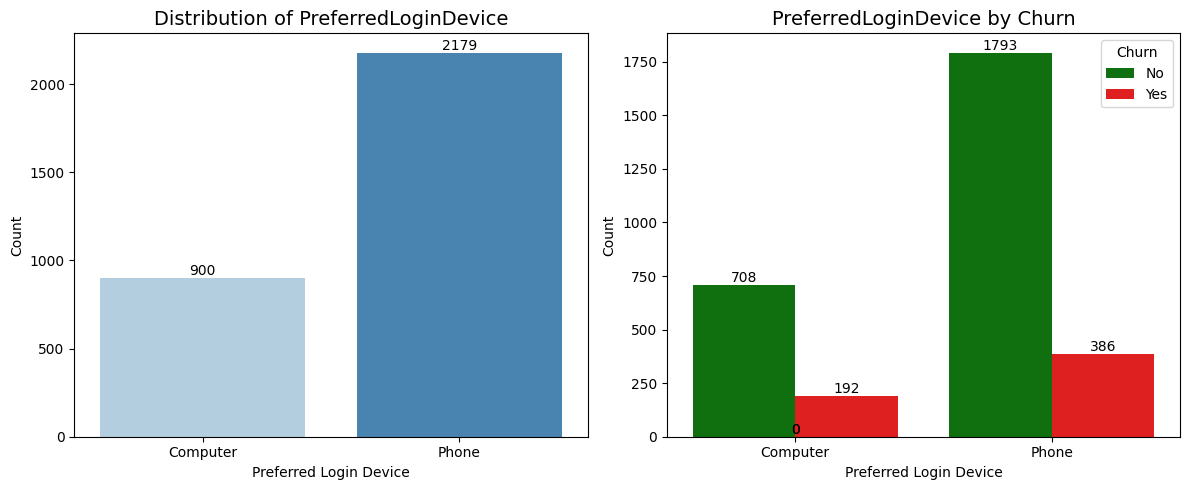

In [39]:
plt.figure(figsize=(12,5))

# 1. Phân phối tổng
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='PreferredLoginDevice', data=df, palette='Blues')
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)
plt.title('Distribution of PreferredLoginDevice', fontsize=14)
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')

# 2. Phân phối theo Churn
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df, palette={0:'green', 1:'red'})
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)
plt.title('PreferredLoginDevice by Churn', fontsize=14)
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

>The most preferred login device is the phone (2,179 customers), significantly higher than the computer (900 customers).

>Churn (red) accounts for 386 customers in the phone group and 192 customers in the computer group.

>Non-churn (green) dominates both groups, especially among phone users (1,793 customers).
→ Phone users not only make up the largest segment but also have a higher number of churners compared to computer users.

### PreferredPaymentMode by Churn

/tmp/ipython-input-1377112748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='PreferredPaymentMode', data=df, palette='Blues')


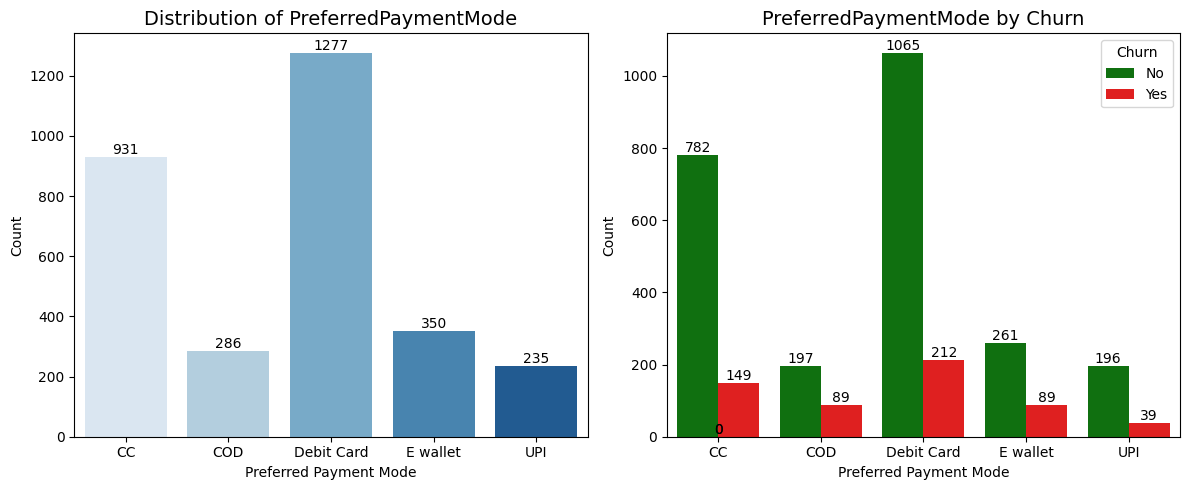

In [40]:
plt.figure(figsize=(12,5))

# 1. Phân phối tổng
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='PreferredPaymentMode', data=df, palette='Blues')
plt.title('Distribution of PreferredPaymentMode', fontsize=14)
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count')

# Thêm số liệu trên đầu cột
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5),
                 textcoords='offset points')

# 2. Phân phối theo Churn
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df, palette={0:'green', 1:'red'})
plt.title('PreferredPaymentMode by Churn', fontsize=14)
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])

# Thêm số liệu trên đầu cột
for p in ax2.patches:
    height = int(p.get_height())
    ax2.annotate(f'{height}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

>The most preferred payment mode is Debit Card (1,277 customers), followed by Credit Card (CC) (931 customers).

>The least preferred is UPI (235 customers).

>hurn (red) is highest among Debit Card users (212 customers) and lowest among UPI users (39 customers).

>Non-churn (green) dominates all payment modes, especially in Debit Card (1,065 customers).
→ Debit card is the top choice overall, but also sees the highest churn count.

# MACHINE LEARING

## Balancing the Dataset Using Oversampling

In [41]:
from sklearn.utils import resample
data_0 = df.loc[df['Churn'] == 0]
data_1 = df.loc[df['Churn'] == 1]

# Count total each churn feature
n_0 = len(data_0)
n_1 = len(data_1)

# Applying oversampling method
data_oversampling = resample(data_1, replace=True, n_samples=n_0, random_state=42)
data_new = pd.concat([data_oversampling, data_0])
data_new = data_new.sample(frac=1)
data_new.reset_index(drop=True, inplace=True)


In [42]:
data_new['Churn'].value_counts()

,count
Churn,
0,2501
1,2501


### Checking infomation

In [43]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5002 non-null   category
 1   Tenure                       5002 non-null   Int64   
 2   PreferredLoginDevice         5002 non-null   category
 3   CityTier                     5002 non-null   category
 4   WarehouseToHome              5002 non-null   Int64   
 5   PreferredPaymentMode         5002 non-null   category
 6   Gender                       5002 non-null   category
 7   HourSpendOnApp               5002 non-null   Int64   
 8   NumberOfDeviceRegistered     5002 non-null   Int64   
 9   PreferedOrderCat             5002 non-null   category
 10  SatisfactionScore            5002 non-null   Int64   
 11  MaritalStatus                5002 non-null   category
 12  NumberOfAddress              5002 non-null   Int64   
 13  Com

## ONE HOT ENCODING

In [44]:
df_encoded = pd.get_dummies(data_new, columns=['Churn','PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'], drop_first= True)
df_encoded.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Rare,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Phone,MaritalStatus_Married,MaritalStatus_Single,Complain_1
0,1,31,3,5,3,7,15,1,2,4,...,True,False,False,True,False,False,True,False,True,True
1,1,15,4,5,3,3,12,2,2,3,...,False,False,False,True,False,False,True,False,True,True
2,9,16,2,4,5,2,13,1,1,0,...,True,False,False,False,False,False,True,False,True,False
3,15,16,4,4,5,4,22,1,2,5,...,True,False,False,True,False,False,True,True,False,False
4,1,24,3,4,3,2,12,1,2,1,...,True,False,False,False,False,False,True,True,False,True


### Checking infomation again

In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               5002 non-null   Int64  
 1   WarehouseToHome                      5002 non-null   Int64  
 2   HourSpendOnApp                       5002 non-null   Int64  
 3   NumberOfDeviceRegistered             5002 non-null   Int64  
 4   SatisfactionScore                    5002 non-null   Int64  
 5   NumberOfAddress                      5002 non-null   Int64  
 6   OrderAmountHikeFromlastYear          5002 non-null   Int64  
 7   CouponUsed                           5002 non-null   Int64  
 8   OrderCount                           5002 non-null   Int64  
 9   DaySinceLastOrder                    5002 non-null   Int64  
 10  CashbackAmount                       5002 non-null   Float64
 11  Churn_1                       

## Correlation

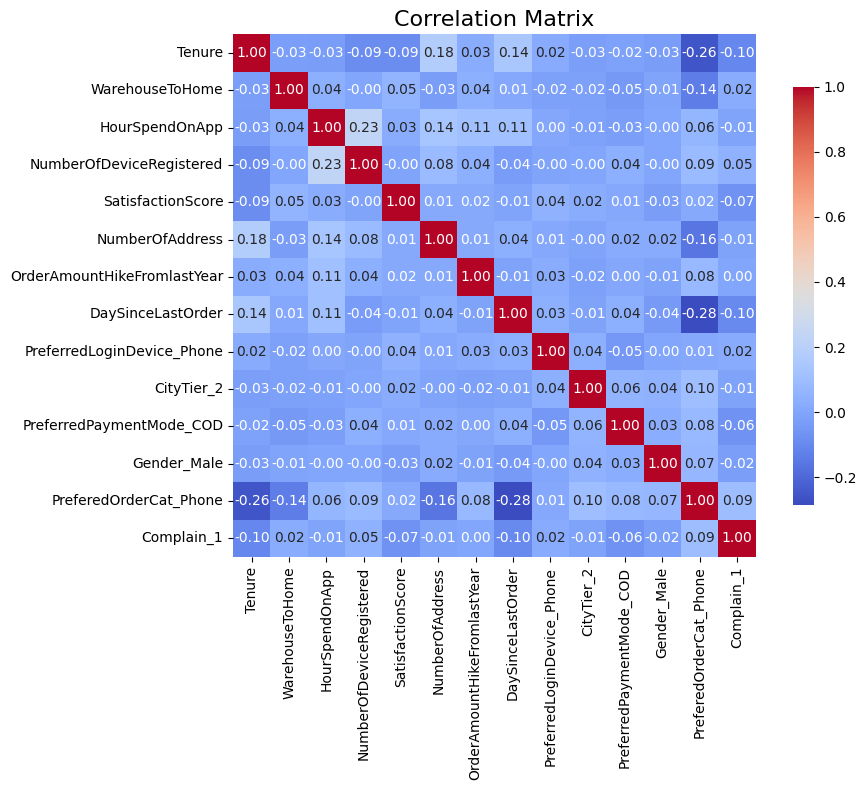

In [46]:
# Chọn đúng các cột cần kiểm tra
cols = [
    "Tenure",
    "WarehouseToHome",
    "HourSpendOnApp",
    "NumberOfDeviceRegistered",
    "SatisfactionScore",
    "NumberOfAddress",
    "OrderAmountHikeFromlastYear",
    "DaySinceLastOrder",

    "PreferredLoginDevice_Phone",
    "CityTier_2",
    "PreferredPaymentMode_COD",
    "Gender_Male",
    "PreferedOrderCat_Phone",
    "Complain_1"
]
# Tính ma trận tương quan
corr_matrix = df_encoded[cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

## Building Model

In [55]:
x = df_encoded[['Tenure','Gender_Male','CityTier_3','Complain_1','PreferedOrderCat_Phone','MaritalStatus_Single','PreferredPaymentMode_COD','NumberOfDeviceRegistered','WarehouseToHome','DaySinceLastOrder','NumberOfAddress','SatisfactionScore']]
y = df_encoded['Churn_1']

In [56]:
x = sm.add_constant(x)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [58]:
x_train = x_train.astype(float)
model = sm.Logit(y_train.astype(int), x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.450810
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Churn_1   No. Observations:                 3501
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           12
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.3495
Time:                        01:31:00   Log-Likelihood:                -1578.3
converged:                       True   LL-Null:                       -2426.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.9253      0.320    -12.264      0.000      -4.553

>Pseudo R² = 0.3495 → The model explains approximately 35% of the variation in churn. In the context of customer behavior data, this is considered quite good.

>All variables have p-value < 0.05, meaning they are statistically significant (in the context of this dataset).

>Top 3 factors that significantly increase churn risk

>Complain_1 (coef = 1.6168, OR ≈ 5.03)
→ Customers who have lodged a complaint are about 5 times more likely to churn.

>PreferredPaymentMode_COD (coef = 0.8829, OR ≈ 2.42)
→ Paying via Cash on Delivery increases churn likelihood by about 2.4 times.

>PreferredOrderCat_Phone (coef = 0.8953, OR ≈ 2.45)
→ Purchasing from the Phone category raises churn risk by about 2.45 times.

>Top 3 factors that reduce churn risk

>Tenure (coef = -0.1685, OR ≈ 0.84)
→ Each additional month of relationship reduces churn risk by about 16%.

>DaySinceLastOrder (coef = -0.1891, OR ≈ 0.83)
→ A longer interval since the last purchase reduces churn risk by about 17%.

>WarehouseToHome (small effect, coef = -0.0385, OR ≈ 0.96)
→ Slightly shorter warehouse-to-home distance is beneficial, but the impact is minimal.

### Binary Classification with Custom Decision Threshold

In [69]:
# Dự đoán xác suất churn
y_pred_prob = model.predict(x_test.astype(float))

# Chuyển xác suất thành churn (0/1) dựa trên ngưỡng 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Xem kết quả
print(y_pred)

1501    0
2586    0
2653    0
1055    0
705     1
       ..
1538    0
1837    1
2380    0
1912    1
1840    1
Length: 1501, dtype: int64


>The prediction results for the test set show that the model classifies customers into two groups: 0 – not likely to churn and 1 – high churn risk, based on a 0.6 probability threshold.
This enables the business to quickly identify at-risk customers and prioritize targeted retention strategies.

### Confusion Matrix

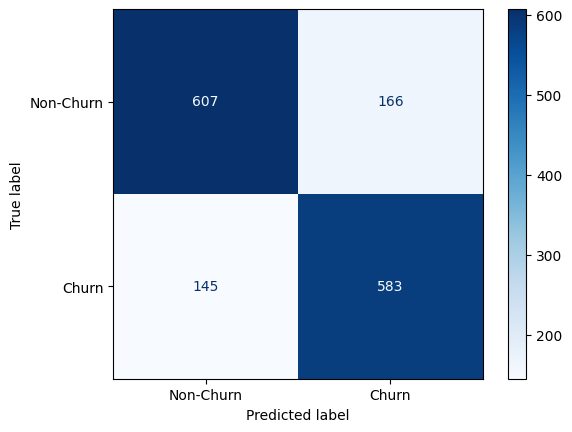

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tính Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Churn", "Churn"])
disp.plot(cmap='Blues', values_format='d')

>Threshold Selection Rationale
A threshold of 0.5 was chosen to align with the project’s goal of detecting as many potential churn cases as possible. This maximizes recall, ensuring that high-risk customers are identified for proactive retention actions, even at the cost of a slightly higher false positive rate.

## Logistic Regression with Evaluation Metrics

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_train, y_train)
logreg_prediction = logreg.predict(x_test)
print('Accuracy Score: %s ' % accuracy_score(y_test, logreg_prediction))
print(classification_report(y_test, logreg_prediction))

Accuracy Score: 0.7901399067288475 
              precision    recall  f1-score   support

       False       0.80      0.78      0.79       773
        True       0.78      0.80      0.79       728

    accuracy                           0.79      1501
   macro avg       0.79      0.79      0.79      1501
weighted avg       0.79      0.79      0.79      1501



**Logisstic**

>Overall Accuracy: 79.01%
→ The model correctly predicts whether a customer will churn or stay in about 4 out of 5 cases. This is a solid baseline level for churn prediction in the e-commerce domain.

>Performance by Class

>Non-churn customers (False)

>Precision = 0.80 → 80% of customers predicted as “non-churn” are actually retained.

>Recall = 0.78 → The model correctly identifies 78% of all actual non-churn customers.

>Churn customers (True)

>Precision = 0.78 → 78% of customers predicted as “churn” do actually churn.

>Recall = 0.80 → The model successfully detects 80% of all actual churners.

## Model RandomForest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(x_train, y_train)

# Dự đoán trên tập test
rf_prediction = rf_model.predict(x_test)

# In kết quả
print('Accuracy Score: %f' % accuracy_score(y_test, rf_prediction))
print(classification_report(y_test, rf_prediction))

Accuracy Score: 0.984011
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       773
        True       0.97      0.99      0.98       728

    accuracy                           0.98      1501
   macro avg       0.98      0.98      0.98      1501
weighted avg       0.98      0.98      0.98      1501



**Random Forest**

>Overall Accuracy: 98.40%
→ The model correctly predicts churn vs. non-churn in nearly 98% of cases. This is an extremely high accuracy for churn prediction in e-commerce.

>Class-level performance

>Non-churn customers (False)

>Precision = 0.99 → 99% of predicted “non-churn” customers are actually retained.

>Recall = 0.97 → Captures 97% of all actual non-churn customers.

>Churn customers (True)

>Precision = 0.97 → 97% of predicted “churn” customers do actually churn.

>Recall = 0.99 → Detects 99% of all actual churners.

## Forcasting New Customer

In [72]:
new_customer_rf = pd.DataFrame({
    'const':[1],
 'Tenure': [1],                   # Ví dụ: 12 tháng
    'Gender_Male': [1],               # Nam
    'CityTier_3': [1],                 # Thành phố Tier 3
    'Complain_1': [1],                 # Có khiếu nại
    'PreferedOrderCat_Phone': [1],    # Ưa đặt hàng qua điện thoại
    'MaritalStatus_Single': [1],      # Độc thân
    'PreferredPaymentMode_COD': [0],  # Thanh toán COD
    'NumberOfDeviceRegistered': [5],  # Số thiết bị đăng ký
    'WarehouseToHome': [5],           # Kho đến nhà 5km
    'DaySinceLastOrder': [1],
    'NumberOfAddress': [4],
    'SatisfactionScore': [3]
})

# Dự đoán xác suất churn
pred_prob_new = rf_model.predict_proba(new_customer_rf)[:, 1]
print(f"Xác suất churn khách hàng mới: {pred_prob_new[0]:.4f}")
# Chuyển xác suất sang nhãn (0/1) với ngưỡng 0.5
pred_label_new = (pred_prob_new >= 0.5).astype(int)
print(f"Dự đoán churn (0/1): {pred_label_new[0]}")

Xác suất churn khách hàng mới: 0.8100
Dự đoán churn (0/1): 1


**INSIGHT**

The new customer profile shows: Low tenure (1 month), Male, City Tier 3, Has complaint, Orders via phone, Single, Multiple devices (5), Warehouse 5 km away, Multiple addresses (4).
The model predicts a high churn probability (0.81) → classified as high churn risk.
From EDA: the 0–3 month tenure period is the “golden stage” for retention, requiring the highest resource priority due to the peak churn rate.

**Key improvement actions:**

Resolve complaints quickly with proactive customer care.

Focus on onboarding, offer welcome promotions, and create a positive first experience.

Improve the phone ordering experience or encourage migration to more convenient online channels.

Enhance delivery support for Tier 3 areas, especially when the warehouse is far.


**Respond to the objective question:**

**1. Which model best explains the factors leading to churn?**

The Random Forest model demonstrated the highest performance in explaining and predicting churn.

Accuracy: 0.984

Precision (class = True, churn): 0.97

Recall (class = True, churn): 0.99

F1-score (class = True, churn): 0.98

The model achieves very high accuracy and is particularly strong in recall, meaning it rarely misses customers who actually churn.

**2. Which factor has the strongest impact on churn? Is there statistical evidence?**

From the Logistic Regression model:

Most influential positive factor:

Complain_1 (coef = 1.616, p < 0.05)

e^β ≈ 5.03 → Customers who have filed a complaint are ~5 times more likely to churn compared to those who have not, holding other variables constant.

Most influential negative factor:

Tenure (coef = -0.1685, p < 0.05)

e^β ≈ 0.845 → Each additional month of tenure reduces the odds of churn by about 15.5%.

Other significant positive factors (p < 0.05):

PreferredOrderCat_Phone → e^β ≈ 2.45

MaritalStatus_Single → e^β ≈ 1.90

PreferredPaymentMode_COD → e^β ≈ 2.29

CityTier_3 → e^β ≈ 1.73

-> Statistical evidence: All above variables have p-values < 0.05, indicating statistically significant effects on churn.

**3. What insights can be drawn from the data to inform customer retention strategies?**

Female – City Tier 1: Large customer base but lower churn rate compared to City Tier 3 → high-value segment, should focus on upselling and cross-selling.

Female – City Tier 3: Higher churn rate → prioritize customer care, service improvements, and enhancing experience.

Short-tenure customers: Implement onboarding programs, welcome gifts, or retention promotions during the first 3 months.

Customers with complaints: Establish fast, personalized resolution processes to improve satisfaction.

Encourage online ordering channels: Increase convenience and engagement, reducing churn in customers who frequently order via phone.

**4.What prediction probability threshold allows the model to detect the highest number of potential churn customers?**

From the confusion matrix above:

True Positives (TP) = 583 → correctly predicted churn customers.

False Negatives (FN) = 145 → churn customers missed by the model.

False Positives (FP) = 166 → non-churn customers predicted as churn.

True Negatives (TN) = 607 → correctly predicted non-churn customers.

With the chosen threshold of 0.5, the model prioritizes maximizing recall for churn detection. This is evident because the number of TP (583) is significantly higher than FN (145), meaning most actual churn cases are successfully identified. Although there are 166 FP cases (false alarms), this trade-off is acceptable since the cost of mistakenly targeting a non-churn customer is much lower than the loss of a true churn customer.

Overall, the balance between TP and TN indicates that the model does not heavily favor one class, while effectively supporting the project’s goal of early identifying at-risk customers for retention efforts

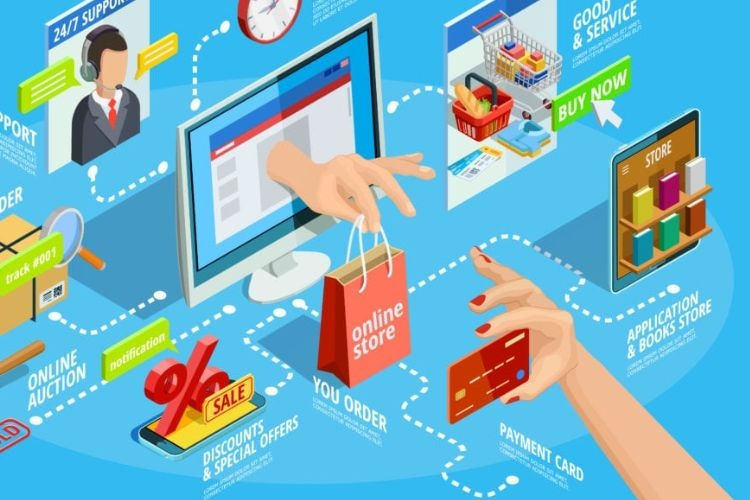